# ETF Trading Project 1

An ETF is an Exchange-Traded Fund which is traded on stock exchanges. An ETF is a collection of stocks which if managed right, can lead to very beneficial outcomes.

*Goal*: Which ETF should we pick to give us the best return?

To answer this, we must look at three questions:
* What is the investment criteria we are looking at?
    * We want to pick and ETF that is going to benefit us most, we can choose which ETFs to invest in by finding which has the lowest risk and the highest reward. 
* How did we pick the variable to analyze for the first question?
    * There are multiple different variables that we could analyze that could help us decide which ETF is the most promising for maximum profit, so how do you decide which one will best predict a good return? 
* Is short-term trading better than long-term (ex. buy and holding)? 

*Data Collection & Cleaning*

We collected all of our data from the ETF database which is publicly available for download. The ETFs we chose to analyze were picked at random. We decided to look at the ETFs SPY, QQQ, GLD, TIP, and VWO.

First we imported each of the ETF’s data from CSV files. Then all DataFrames for each ETF is merged by date which allows us to compare and contrast.

In [1]:
#Import Dependencies
import yfinance as yf
import os
import pyfolio as pf
from datetime import datetime
import numpy as np

import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

C:\Users\mmkat\anaconda3\New folder\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
#Create a class to import the data
def download_data(stock, start, end):
    data = yf.download(stock, start, end)
    return data

In [3]:
#Creating a list of the names of the ETFs
stocks = ['SPY', 'QQQ','GLD', 'TIP', 'VWO']

#Getting data from the stocks from January 1, 2000 to December 31, 2022
data = download_data(stocks, '2000-1-1', '2022-12-31')

#Importing data to CSV file
data.to_csv('Mul.csv')

[*********************100%***********************]  5 of 5 completed


In [4]:
#Drop NaN values
data.dropna()
p_spy = data['Pct_Change_SPY'] = data['Close']['SPY'].pct_change()
p_qqq = data['Pct_Change_QQQ'] = data['Close']['QQQ'].pct_change()
p_gld = data['Pct_Change_GLD'] = data['Close']['GLD'].pct_change()
p_tip = data['Pct_Change_TIP'] = data['Close']['TIP'].pct_change()
p_vwo = data['Pct_Change_VWO'] = data['Close']['VWO'].pct_change()

#Show DataFrame
data

Adj Close                                                 \
                   GLD         QQQ         SPY         TIP        VWO   
Date                                                                    
2000-01-03         NaN   81.471107   95.308792         NaN        NaN   
2000-01-04         NaN   75.882072   91.581635         NaN        NaN   
2000-01-05         NaN   73.947365   91.745483         NaN        NaN   
2000-01-06         NaN   68.868874   90.270973         NaN        NaN   
2000-01-07         NaN   77.386795   95.513596         NaN        NaN   
...                ...         ...         ...         ...        ...   
2022-12-23  167.259995  267.359985  382.910004  106.930000  38.750000   
2022-12-27  168.669998  263.579987  381.399994  106.440002  39.360001   
2022-12-28  167.910004  260.100006  376.660004  106.320000  38.790001   
2022-12-29  168.850006  266.440002  383.440002  106.760002  39.459999   
2022-12-30  169.639999  266.279999  382.429993  106.440002  38.980000   

                 Close                                                 ...  \
                   GLD         QQQ         SPY         TIP        VWO  ...   
Date                                                                   ...   
2000-01-03         NaN   94.750000  145.437500         NaN        NaN  ...   
2000-01-04         NaN   88.250000  139.750000         NaN        NaN  ...   
2000-01-05         NaN   86.000000  140.000000         NaN        NaN  ...   
2000-01-06         NaN   80.093750  137.750000         NaN        NaN  ...   
2000-01-07         NaN   90.000000  145.750000         NaN        NaN  ...   
...                ...         ...         ...         ...        ...  ...   
2022-12-23  167.259995  267.359985  382.910004  106.930000  38.750000  ...   
2022-12-27  168.669998  263.579987  381.399994  106.440002  39.360001  ...   
2022-12-28  167.910004  260.100006  376.660004  106.320000  38.790001  ...   
2022-12-29  168.850006  266.440002  383.440002  106.760002  39.459999  ...   
2022-12-30  169.639999  266.279999  382.429993  106.440002  38.980000  ...   

               Volume                                             \
                  GLD       QQQ       SPY        TIP         VWO   
Date                                                               
2000-01-03        NaN  36345200   8164300        NaN         NaN   
2000-01-04        NaN  33786600   8089800        NaN         NaN   
2000-01-05        NaN  42496600  12177900        NaN         NaN   
2000-01-06        NaN  37134800   6227200        NaN         NaN   
2000-01-07        NaN  28138200   8066500        NaN         NaN   
...               ...       ...       ...        ...         ...   
2022-12-23  2912300.0  39373600  59857300  2523500.0  14616500.0   
2022-12-27  6885700.0  38009000  51638200  2464500.0  13829000.0   
2022-12-28  3662500.0  47139000  70911500  3091400.0  15688000.0   
2022-12-29  3345900.0  45893600  66970900  3141300.0  13383100.0   
2022-12-30  2863300.0  37796100  83975100  4694200.0  15760600.0   

           Pct_Change_SPY Pct_Change_QQQ Pct_Change_GLD Pct_Change_TIP  \
                                                                         
Date                                                                     
2000-01-03            NaN            NaN            NaN            NaN   
2000-01-04      -0.039106      -0.068602            NaN            NaN   
2000-01-05       0.001789      -0.025496            NaN            NaN   
2000-01-06      -0.016071      -0.068677            NaN            NaN   
2000-01-07       0.058076       0.123683            NaN            NaN   
...                   ...            ...            ...            ...   
2022-12-23       0.005752       0.002249       0.002998      -0.002239   
2022-12-27      -0.003944      -0.014138       0.008430      -0.004582   
2022-12-28      -0.012428      -0.013203      -0.004506      -0.001127   
2022-12-29       0.018000       0.024375       0.005598 

In [5]:
#Finding the cumulative product of the data for each ETF
spy = (data['Pct_Change_SPY']+1).cumprod()
qqq = (data['Pct_Change_QQQ']+1).cumprod()
gld = (data['Pct_Change_GLD']+1).cumprod()
tip = (data['Pct_Change_TIP']+1).cumprod()
vwo = (data['Pct_Change_VWO']+1).cumprod()

Using Pyfolio to find annual return, cumulative return, annual volatility, max drawdown, etc. for each ETF

# SPY

Start date,2000-01-03
End date,2022-12-30
Total months,275
,Backtest
Annual return,6.2%
Cumulative returns,301.3%
Annual volatility,19.9%
Sharpe ratio,0.40
Calmar ratio,0.11
Stability,0.85
Max drawdown,-55.2%


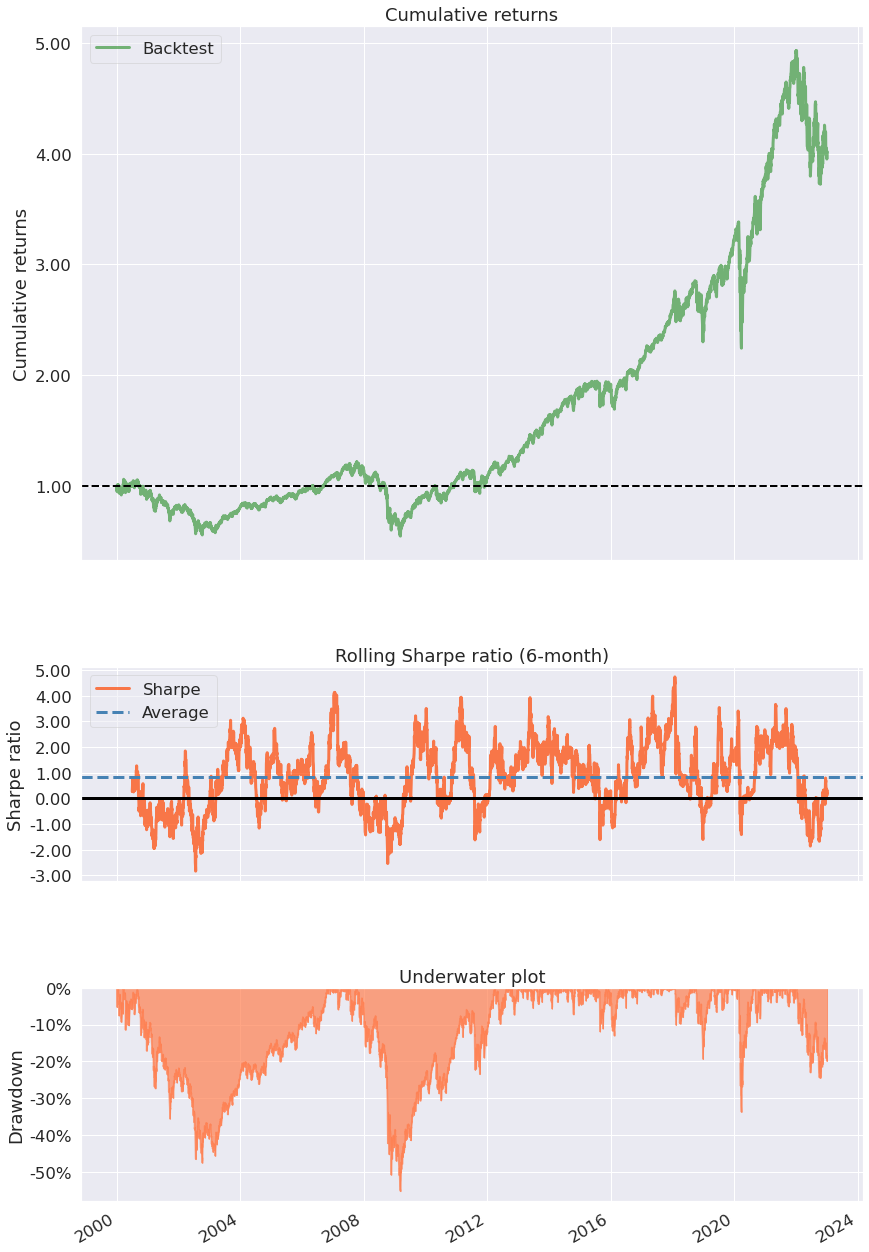

In [6]:
pf.create_simple_tear_sheet(data['Adj Close']['SPY'].pct_change())

# QQQ

Start date,2000-01-03
End date,2022-12-30
Total months,275
,Backtest
Annual return,5.3%
Cumulative returns,226.8%
Annual volatility,27.7%
Sharpe ratio,0.32
Calmar ratio,0.06
Stability,0.77
Max drawdown,-83.0%


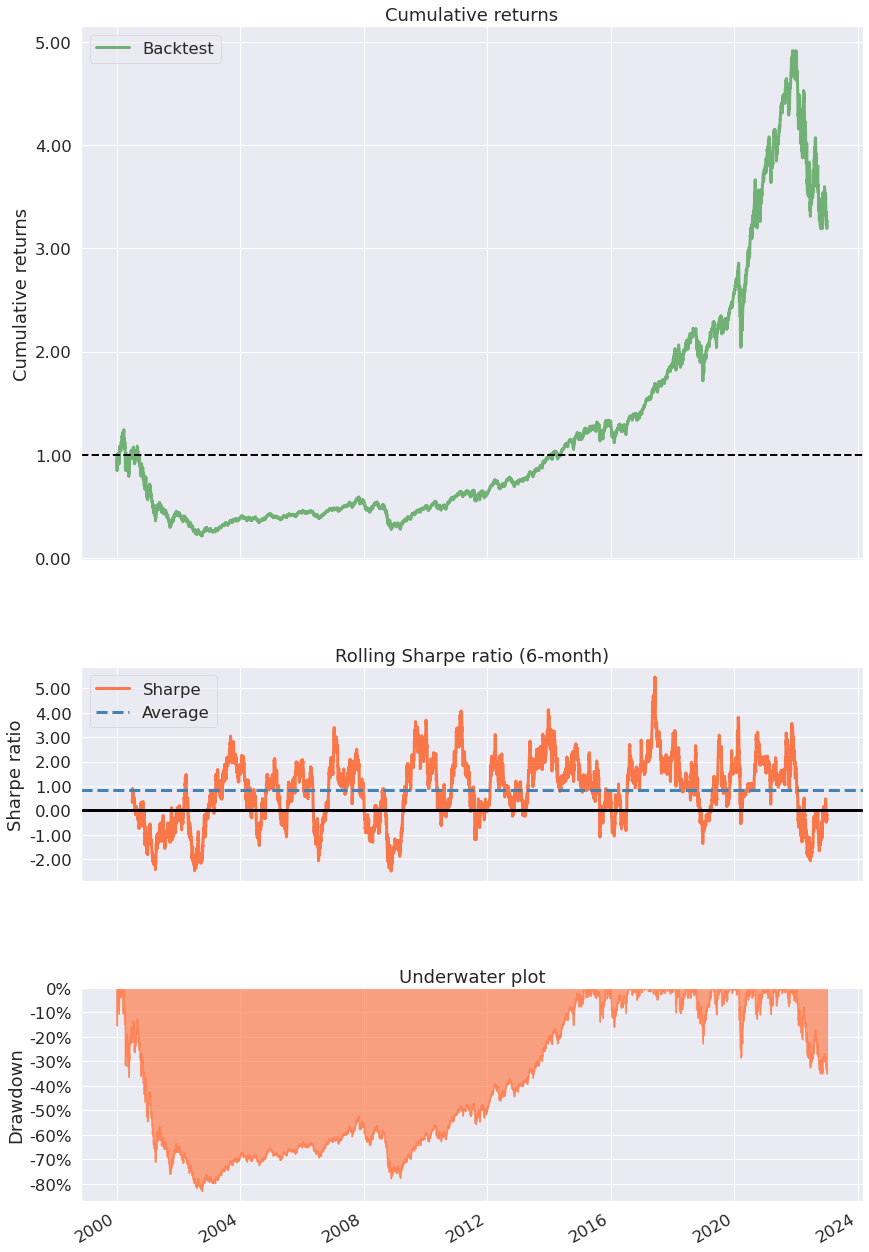

In [11]:
pf.create_simple_tear_sheet(data['Adj Close']['QQQ'].pct_change())

# GLD

Start date,2000-01-03
End date,2022-12-30
Total months,275
,Backtest
Annual return,6.0%
Cumulative returns,282.2%
Annual volatility,17.9%
Sharpe ratio,0.50
Calmar ratio,0.13
Stability,0.62
Max drawdown,-45.6%


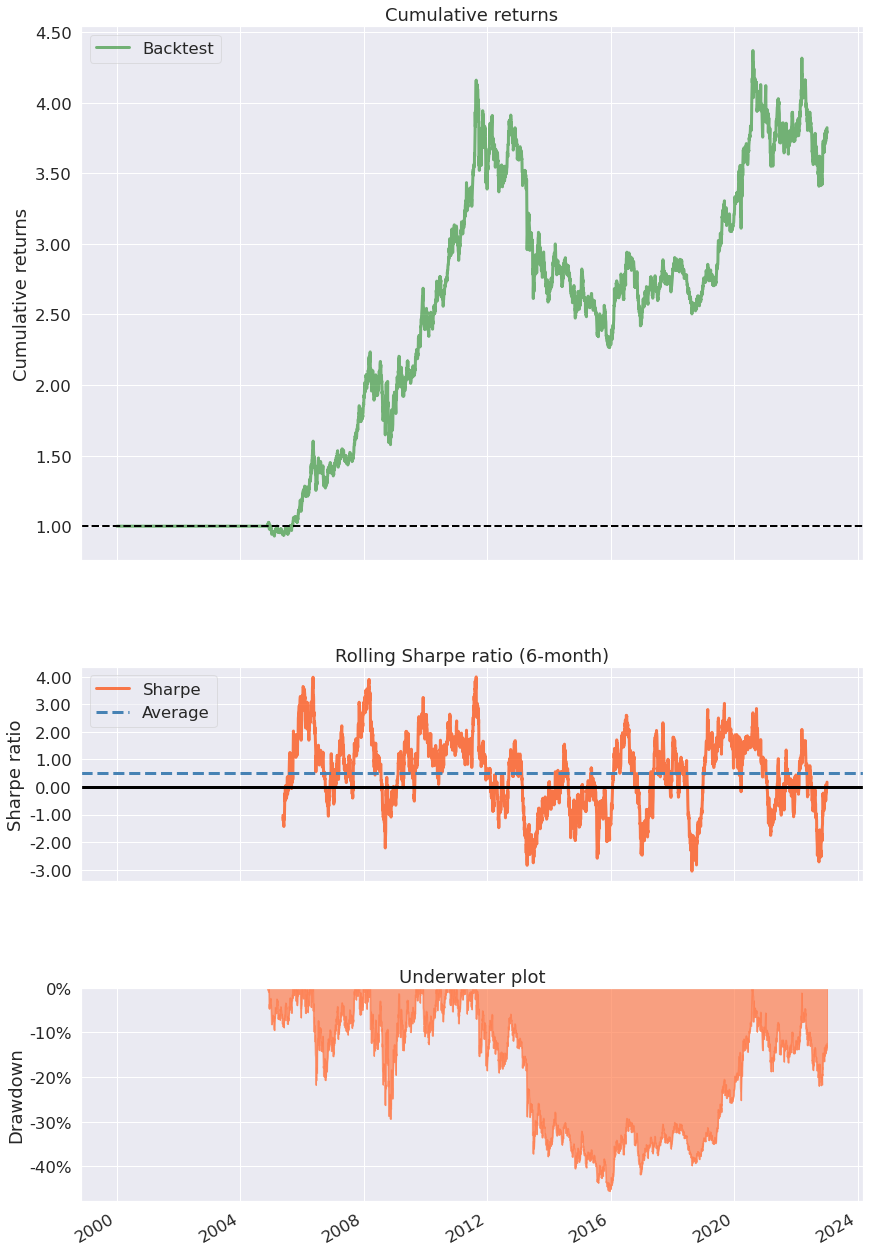

In [7]:
pf.create_simple_tear_sheet(data['Adj Close']['GLD'].pct_change())

# VWO

Start date,2000-01-03
End date,2022-12-30
Total months,275
,Backtest
Annual return,4.0%
Cumulative returns,147.2%
Annual volatility,27.7%
Sharpe ratio,0.32
Calmar ratio,0.06
Stability,0.62
Max drawdown,-67.7%


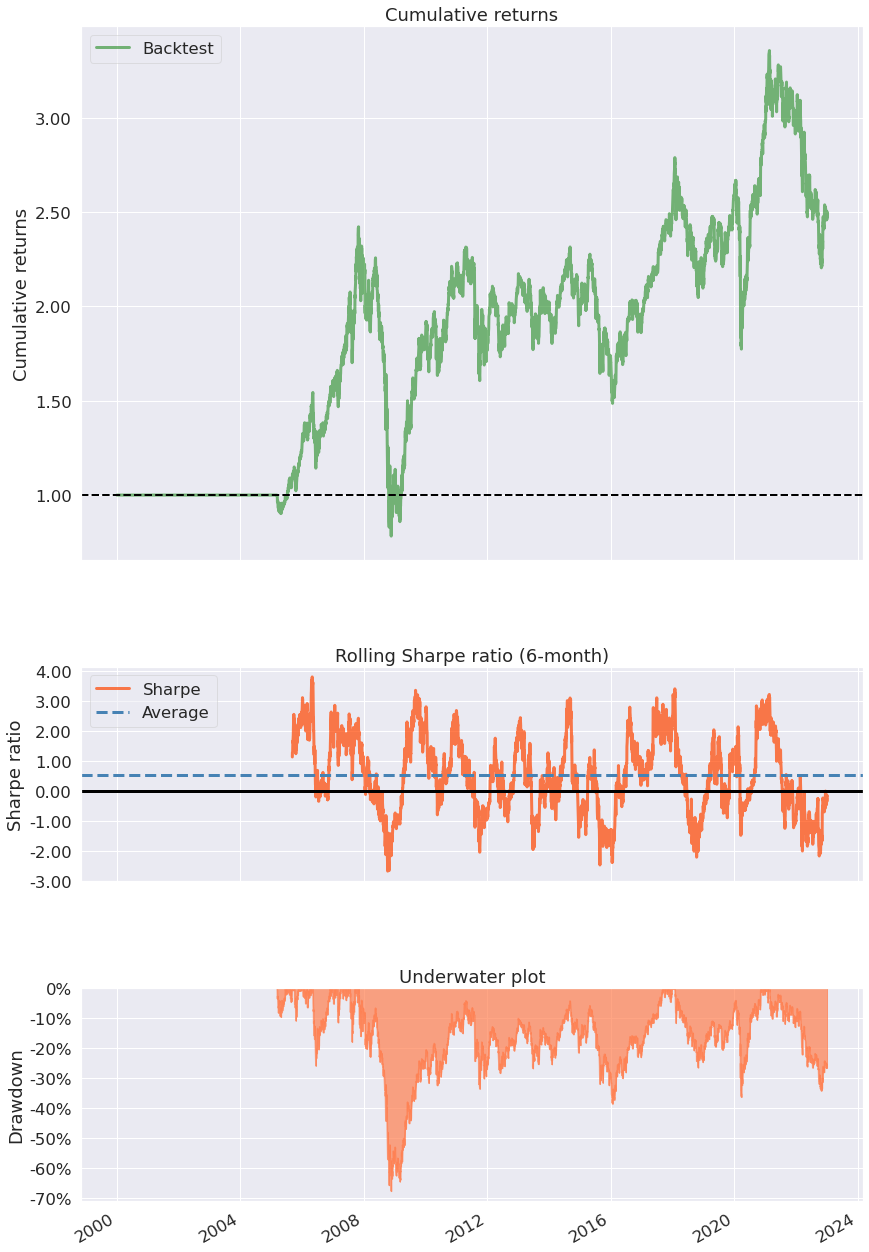

In [8]:
pf.create_simple_tear_sheet(data['Adj Close']['VWO'].pct_change())

# TIP

Start date,2000-01-03
End date,2022-12-30
Total months,275
,Backtest
Annual return,2.9%
Cumulative returns,91.2%
Annual volatility,6.3%
Sharpe ratio,0.57
Calmar ratio,0.20
Stability,0.92
Max drawdown,-14.4%


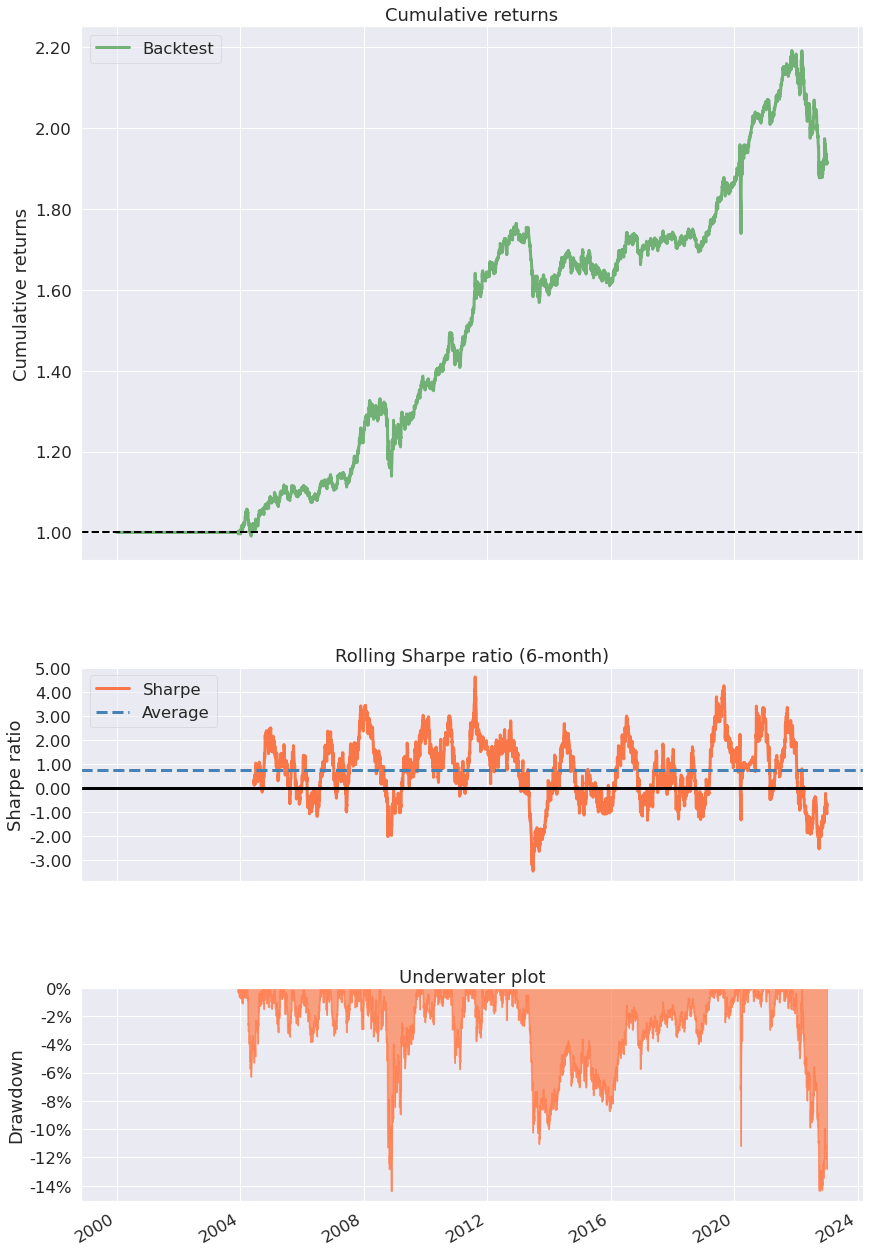

In [10]:
pf.create_simple_tear_sheet(data['Adj Close']['TIP'].pct_change())

*Highest Return*

SPY had the highest cumulative return out of all of the ETFs, with a value of 301.254%. While it did not have the highest annual return value is managed to surpass the other ETFs over the entire time period. 

# Visualizations

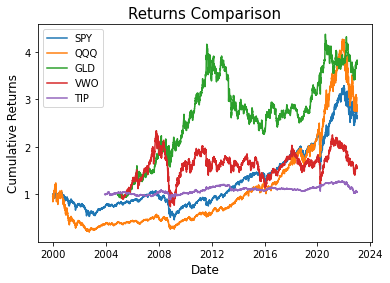

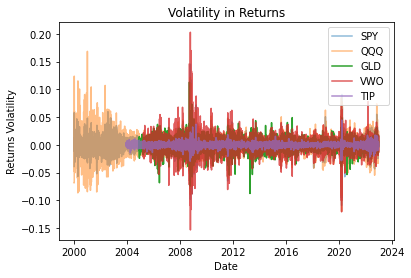

<AxesSubplot:title={'center':'Annual returns'}, xlabel='Returns', ylabel='Year'>

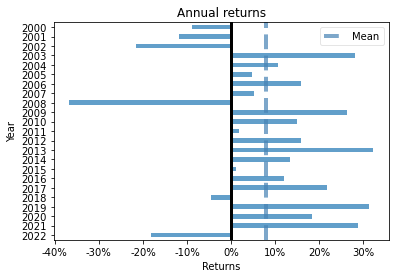

In [9]:
#Plot of the cumulative returns of each ETF over the time period
plt.plot(spy, label = 'SPY')
plt.plot(qqq, label = 'QQQ')
plt.plot(gld, label = 'GLD')
plt.plot(vwo, label = 'VWO')
plt.plot(tip, label = 'TIP')

plt.ylabel('Cumulative Returns', fontsize = 12)
plt.xlabel('Date', fontsize = 12)
plt.title('Returns Comparison', fontsize = 15)
plt.legend()
plt.show()


#Plot of the return volatility of each ETF over the time period
plt.plot(p_spy, alpha = 0.5)
plt.plot(p_qqq, alpha = 0.5)
plt.plot(p_gld, alpha = 1)
plt.plot(p_vwo, alpha = 0.75)
plt.plot(p_tip, alpha = 0.75)

plt.ylabel('Returns Volatility')
plt.xlabel('Date')
plt.title('Volatility in Returns')
plt.legend(['SPY','QQQ', 'GLD', 'VWO', 'TIP'], loc = 'upper right')
plt.show()


#SPY annual returns plot
pf.plot_annual_returns(data['Adj Close']['SPY'].pct_change())

In [12]:
#Put SPY data into a DataFrame
df = download_data('SPY','2000-01-03', '2022-12-30')

#Create columns for short term and long term investments using .rolling of the mean
df['sma'] = df['Adj Close'].rolling(window=20).mean()
df['lma'] = df['Adj Close'].rolling(window=60).mean()

df['signal'] = np.where((df['Adj Close']> df['sma']) & (df['Adj Close']> df['lma']),1,0)
df['signal'] = np.where((df['Adj Close']< df['sma']) & (df['Adj Close']< df['lma']),0,df['signal'])


df['buy&hold_return'] = df['Adj Close'].pct_change()

df['strategy_return'] = df['signal'].shift(1) * df['buy&hold_return']

[*********************100%***********************]  1 of 1 completed


In [13]:
#Calculating buy and hold return and strategy return
bnh = (df['buy&hold_return']+1).cumprod()[-1]
stg = (df['strategy_return']+1).cumprod()[-1]

#Print outcomes
print(f'Buy and Hold return {bnh}')
print(f'Strategy return {stg}')

Buy and Hold return 4.0231322961839595
Strategy return 1.4506635718248062


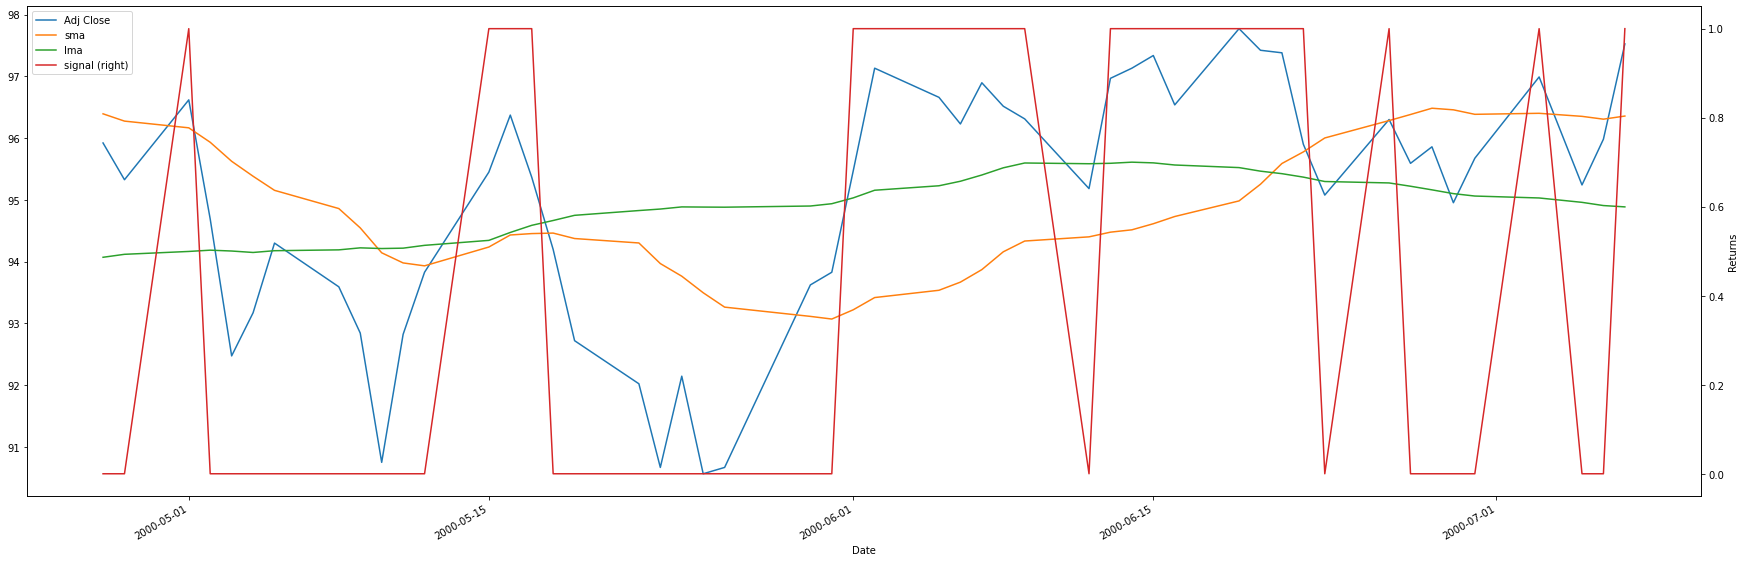

In [15]:
#Plotting short-term buys vs. long-term holdings
#Short-term ex: buy and sell quickly
#Long-term ex: holding onto ETF
plot_position = (df[['Adj Close', 'sma', 'lma', 'signal']]).iloc[80:130].plot(secondary_y = 'signal', figsize = (30,10))
plt.ylabel('Returns')
plt.show()

Buy and Hold return 4.0231322961839595
Strategy return 1.4506635718248062


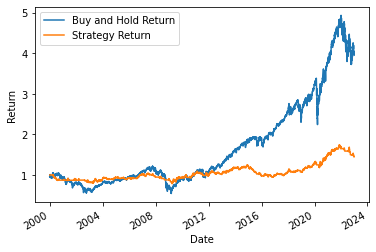

In [19]:
#Plotting the cumulative products of buy and hold returns and strategy returns
(df['buy&hold_return']+1).cumprod().plot(label = 'Buy and Hold Return')
(df['strategy_return']+1).cumprod().plot(label = 'Strategy Return')
plt.legend()
plt.ylabel('Return')
print(f'Buy and Hold return {bnh}')
print(f'Strategy return {stg}')